In [ ]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode



init_notebook_mode(connected = True)
import seaborn as sns
import time

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

pd.set_option('display.max_columns', None)

In [ ]:

!pip install easypreprocessing
from easypreprocessing import EasyPreProcessing
import math
import scipy.stats as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e72f6e85903745c4cf6792e820c6c32908eb5dd90d6807eaa8993c2e05a97290
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
product_data = pd.read_csv(r'/content/drive/MyDrive/product_data.csv')
product_data.shape

(913000, 4)

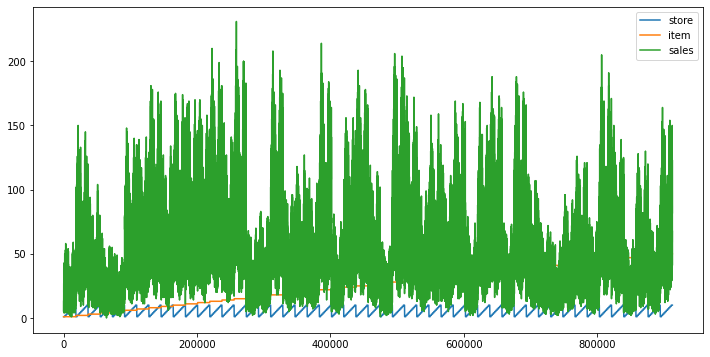

In [ ]:
product_data.plot(figsize=(12,6))

**EDA**

In [ ]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
product_data.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [ ]:
product_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
#Review dataset's basic overview of numerical attributes
product_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


In [ ]:
#Review dataset's basic overview of categorical attributes
product_data.describe(include='O').transpose()

,count,unique,top,freq
date,913000,1826,2013-01-01,500


In [ ]:
#statistical analysis of the data set including categorical variable 
product_data.describe(include='all')

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
unique,1826,NaN,NaN,NaN
top,2013-01-01,NaN,NaN,NaN
freq,500,NaN,NaN,NaN
mean,NaN,5.500000,25.500000,52.250287
std,NaN,2.872283,14.430878,28.801144
min,NaN,1.000000,1.000000,0.000000
25%,NaN,3.000000,13.000000,30.000000
50%,NaN,5.500000,25.500000,47.000000
75%,NaN,8.000000,38.000000,70.000000


In [ ]:
product_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
product_data.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [ ]:
product_data.groupby("store").size()

store
1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
dtype: int64

In [ ]:
product_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

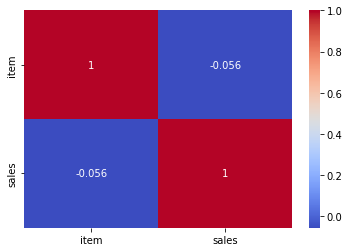

In [ ]:
sns.heatmap(data=product_data[[ 'item','sales']].corr(),
            annot=True, cmap='coolwarm');

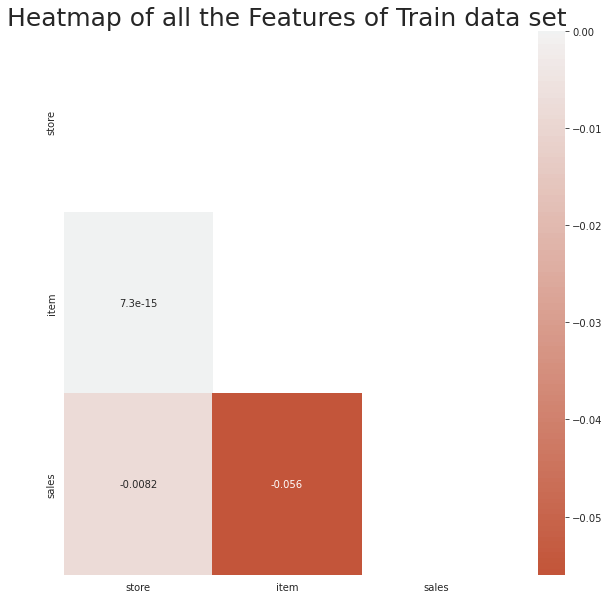

In [ ]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (10,10))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(product_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(product_data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

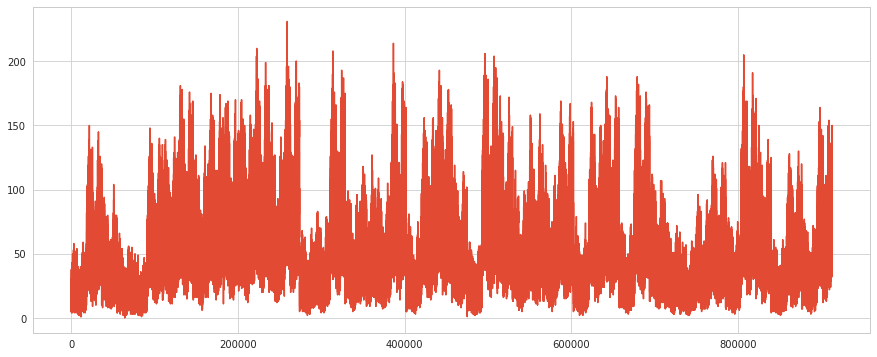

In [ ]:
# The series shows some sales with huge counts

product_data.sales.plot(figsize=(15, 6))
plt.show()

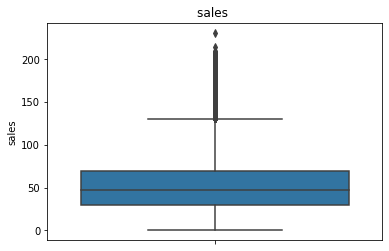

In [ ]:
# there are lots of outliers in the with large quantities


sns.boxplot(y="sales", data=product_data)
plt.title('sales ')
plt.show()

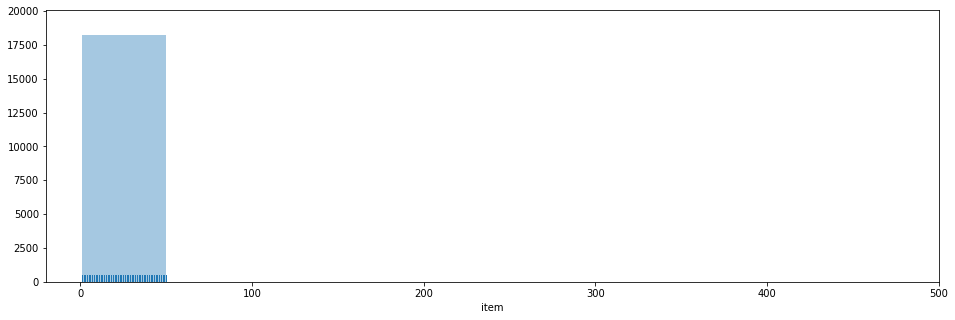

In [ ]:
# Generate item outliers plot

plt.figure(figsize=(16,5))
sns.distplot(product_data['item'], kde=False, rug=True)
plt.xlim(-20, 500)
plt.show()

In [ ]:
print('\nitem descriptive statistics')
print( product_data.item.describe().apply(lambda x: format(x, '10.1f')) )


item descriptive statistics
count      913000.0
mean           25.5
std            14.4
min             1.0
25%            13.0
50%            25.5
75%            38.0
max            50.0
Name: item, dtype: object


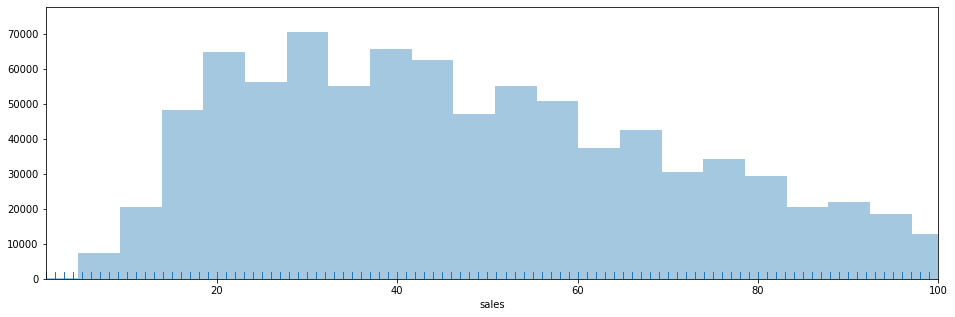

In [ ]:
# Generate sales outliers plot

plt.figure(figsize=(16,5))
sns.distplot(product_data['sales'], kde=False, rug=True)
plt.xlim(1, 100)
plt.show()

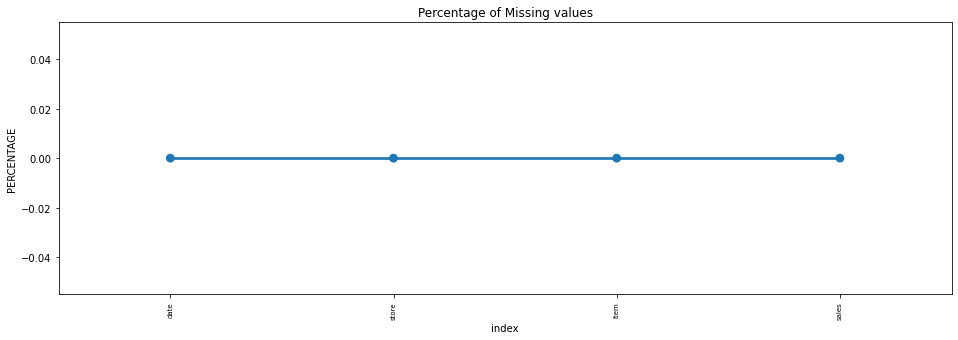

In [ ]:
missing = pd.DataFrame((product_data.isnull().sum())*100/product_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
cat_cols = product_data.select_dtypes(include = ['object']).columns.to_list()
for col in cat_cols:
    print(col)
    print(product_data.groupby([col, 'sales']).size())

date
date        sales
2013-01-01  2        1
            4        4
            5        4
            6        5
            7        3
                    ..
2017-12-31  117      1
            120      1
            124      1
            128      1
            129      1
Length: 185426, dtype: int64


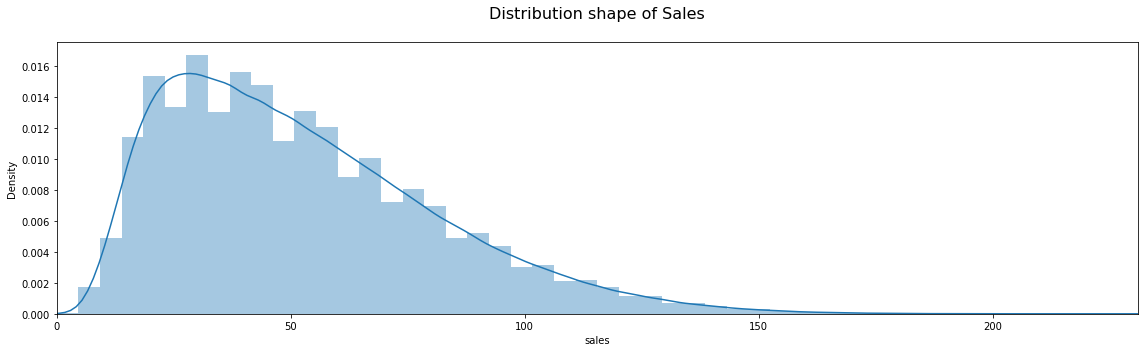

In [ ]:
#Distribution and skewness of sales

plt.figure(figsize=(16,5))
sns.distplot(product_data['sales'], hist_kws={"rwidth": 20.8})
plt.xlim(product_data['sales'].min(), product_data['sales'].max())
plt.title(f"Distribution shape of {'sales'.capitalize()}\n", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
store_id_sums = pd.DataFrame( product_data.groupby(['store'])['sales'].sum() )
store_id_sums = store_id_sums.reset_index() 

In [ ]:
scs_sort = store_id_sums.sort_values(by='sales', ascending=False)
scs_sort.reset_index(inplace=True,drop=True)

Total data count: 913000


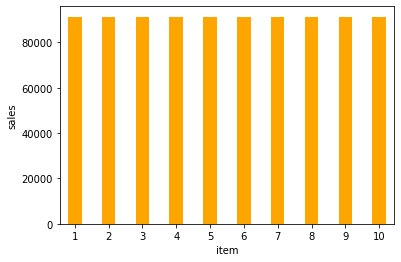

In [ ]:
#barplot for column File_Type
print("Total data count:" ,product_data['sales'].count())

product_data['store'].value_counts().plot.bar(rot=0,width = 0.4,color='orange')
plt.xlabel("store")
plt.ylabel("sales")
plt.show()

In [ ]:
corrMatrix = product_data.corr().abs()['sales'].sort_values(ascending=False)
corrMatrix

sales    1.000000
item     0.055998
store    0.008170
Name: sales, dtype: float64

In [ ]:
#categorical variable
product_data.select_dtypes(object)

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
912995,2017-12-27
912996,2017-12-28
912997,2017-12-29
912998,2017-12-30


In [ ]:
# df_salesdata['ReleaseYear'].value_counts()
product_data.select_dtypes(object).value_counts()

date      
2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Length: 1826, dtype: int64

In [ ]:
# Preprocessing and Implementation

In [ ]:
prep = EasyPreProcessing(r'/content/drive/MyDrive/product_data.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [ ]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

In [ ]:
prep.numerical.impute()

Numerical features imputated successfully.


In [ ]:
raw_data = prep.df

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    913000 non-null  object 
 1   store   913000 non-null  float64
 2   item    913000 non-null  float64
 3   sales   913000 non-null  float64
dtypes: float64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
raw_data

,date,store,item,sales
0,2013-01-01,1.0,1.0,13.0
1,2013-01-02,1.0,1.0,11.0
2,2013-01-03,1.0,1.0,14.0
3,2013-01-04,1.0,1.0,13.0
4,2013-01-05,1.0,1.0,10.0
...,...,...,...,...
912995,2017-12-27,10.0,50.0,63.0
912996,2017-12-28,10.0,50.0,59.0
912997,2017-12-29,10.0,50.0,74.0
912998,2017-12-30,10.0,50.0,62.0


In [ ]:
df_pre=raw_data
def date_conversion(col):     
    date_connection_time = pd.to_datetime(df_pre[col], format="%Y-%m-%d")
    date_format_connect = date_connection_time.dt.tz_localize(None)
    connect_date = date_format_connect.dt.date
    df_pre[col] = connect_date
    df_pre[col]=df_pre[col].astype('datetime64[ns]')

In [ ]:
date_conversion('date')

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  float64       
 2   item    913000 non-null  float64       
 3   sales   913000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 27.9 MB


In [ ]:
def agg_unit_sold(input_col,pred_col):
    sold_df = df_pre[[input_col,pred_col]]
    sold_df_agg = sold_df.groupby([input_col]).agg({pred_col:np.sum})
    return sold_df_agg

In [ ]:
agg = df_pre[['date','sales']]

In [ ]:
agg

,date,sales
0,2013-01-01,13.0
1,2013-01-02,11.0
2,2013-01-03,14.0
3,2013-01-04,13.0
4,2013-01-05,10.0
...,...,...
912995,2017-12-27,63.0
912996,2017-12-28,59.0
912997,2017-12-29,74.0
912998,2017-12-30,62.0


In [ ]:
agg.tail(200)

,date,sales
912800,2017-06-15,105.0
912801,2017-06-16,121.0
912802,2017-06-17,121.0
912803,2017-06-18,150.0
912804,2017-06-19,76.0
...,...,...
912995,2017-12-27,63.0
912996,2017-12-28,59.0
912997,2017-12-29,74.0
912998,2017-12-30,62.0


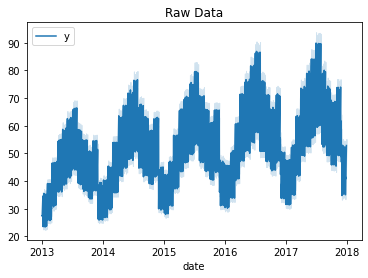

<Figure size 1440x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(20,10)) 
sns.lineplot(x='date', y='sales', label='y', data=agg, ax=ax)
ax.legend(loc='upper left')
ax.set(title='Raw Data', xlabel='date', ylabel='');

**Converting supervised dataset**

units_sold becomes the target variable

day_1, day_2, day_3, day_4 are the input

We will train our model to predict sales based on previous 4 days.

In [ ]:
agg['day_1'] = agg['sales'].shift(-1)
agg['day_2'] = agg['sales'].shift(-2)
agg['day_3'] = agg['sales'].shift(-3)
agg['day_4'] = agg['sales'].shift(-4)

In [ ]:
agg

,date,sales,day_1,day_2,day_3,day_4
0,2013-01-01,13.0,11.0,14.0,13.0,10.0
1,2013-01-02,11.0,14.0,13.0,10.0,12.0
2,2013-01-03,14.0,13.0,10.0,12.0,10.0
3,2013-01-04,13.0,10.0,12.0,10.0,9.0
4,2013-01-05,10.0,12.0,10.0,9.0,12.0
...,...,...,...,...,...,...
912995,2017-12-27,63.0,59.0,74.0,62.0,82.0
912996,2017-12-28,59.0,74.0,62.0,82.0,NaN
912997,2017-12-29,74.0,62.0,82.0,NaN,NaN
912998,2017-12-30,62.0,82.0,NaN,NaN,NaN


In [ ]:
df = agg.dropna()

In [ ]:
df

,date,sales,day_1,day_2,day_3,day_4
0,2013-01-01,13.0,11.0,14.0,13.0,10.0
1,2013-01-02,11.0,14.0,13.0,10.0,12.0
2,2013-01-03,14.0,13.0,10.0,12.0,10.0
3,2013-01-04,13.0,10.0,12.0,10.0,9.0
4,2013-01-05,10.0,12.0,10.0,9.0,12.0
...,...,...,...,...,...,...
912991,2017-12-23,70.0,76.0,51.0,41.0,63.0
912992,2017-12-24,76.0,51.0,41.0,63.0,59.0
912993,2017-12-25,51.0,41.0,63.0,59.0,74.0
912994,2017-12-26,41.0,63.0,59.0,74.0,62.0


**TRAIN AND TEST SPLIT**

In [ ]:
x1, x2, x3, x4,  y = df['day_1'], df['day_2'], df['day_3'], df['day_4'],  df['sales']
x1, x2, x3, x4,  y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4,  y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1),  y.reshape(-1,1)
split_percentage = 20
test_split = int(len(df)*(split_percentage/100))
print(test_split)
x = np.concatenate((x1, x2, x3, x4, ), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

182599


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(730397, 4)
(182599, 4)
(730397, 1)
(182599, 1)


**MODEL BUILDING**

**RANDOM FOREST REGRESSOR** 

Univariate Analysis



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [ ]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

R Sq. Score for Random Forest Regression : 0.7944848127355122


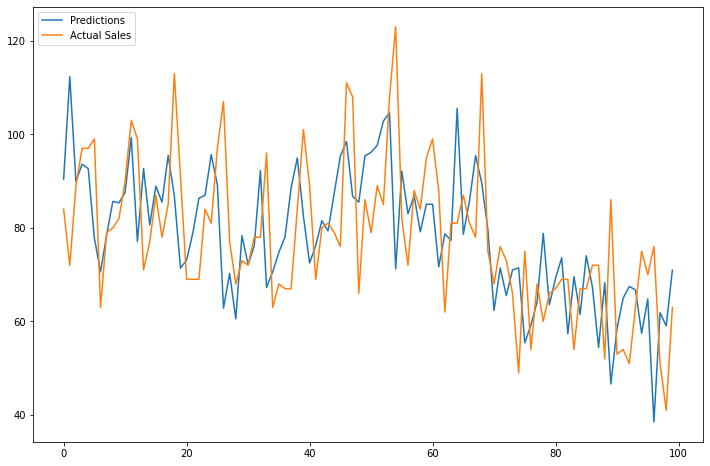

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

**XGBOOST REGRESSOR**

using Univariate Analysis

In [ ]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

[21:38:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

R Sq. Score for XGBoost : 0.8236134680951067


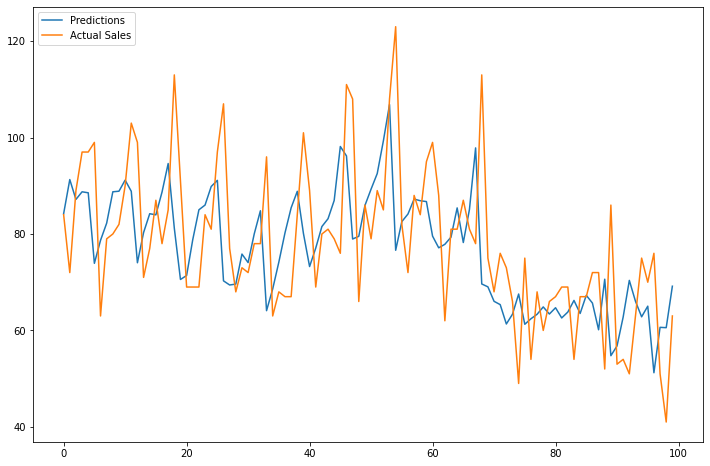

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

**HYPERPARAMETER TUNING FOR XGBOOST**

In [ ]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=8,
    eta = 0.1
    #num_round=50,
    nthread= 16,
    tree_method=exact,
    min_child_weight=100  
    )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [ ]:
xgb_random.fit(X_train, y_train)

In [ ]:
best_random = xgb_random.best_estimator_

In [ ]:
y_pred = best_random.predict(X_test)

In [ ]:
print("R Sq. Score for Random Forest Regression :", best_random.score(X_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - best_random.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))


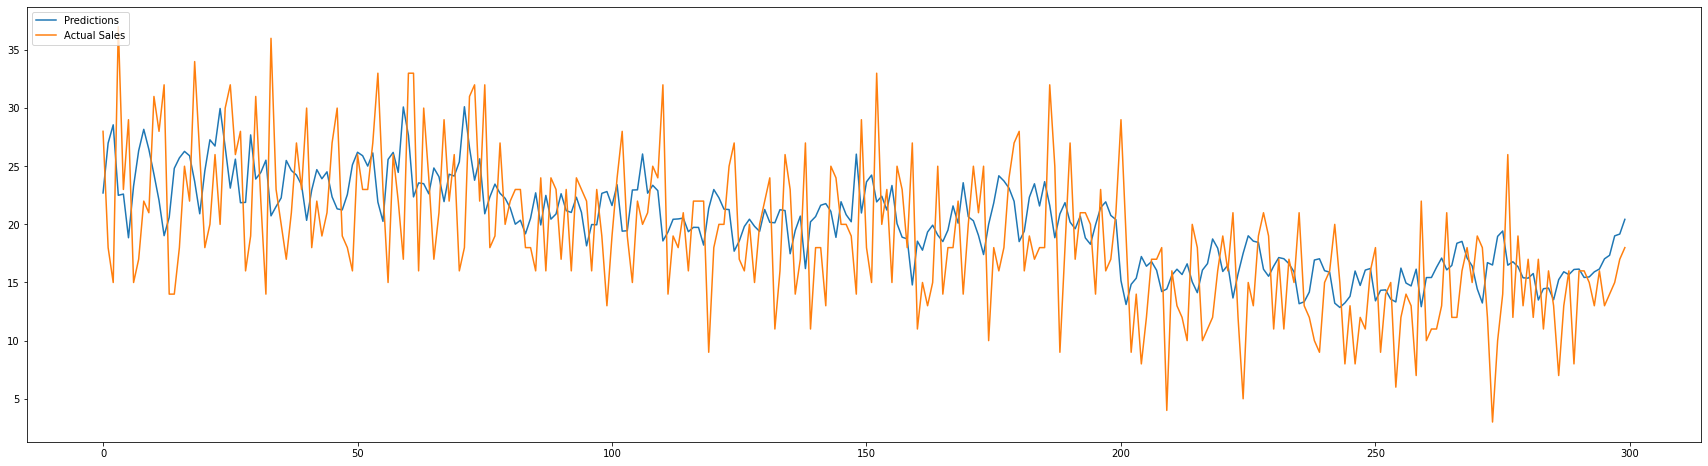

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()

In [ ]:
#training devience plot
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
#feature importance plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()

**Hyperparameter Tuning for Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 120, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [ ]:
best_random = rf_random.best_estimator_

In [ ]:
y_pred = best_random.predict(X_test)

In [ ]:
print("R Sq. Score for Random Forest Regression :", best_random.score(X_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - best_random.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))


R Sq. Score for Random Forest Regression : 0.8164064414376697
Adj. R Sq. Score for Random Forest Regression : 0.8164024195408153


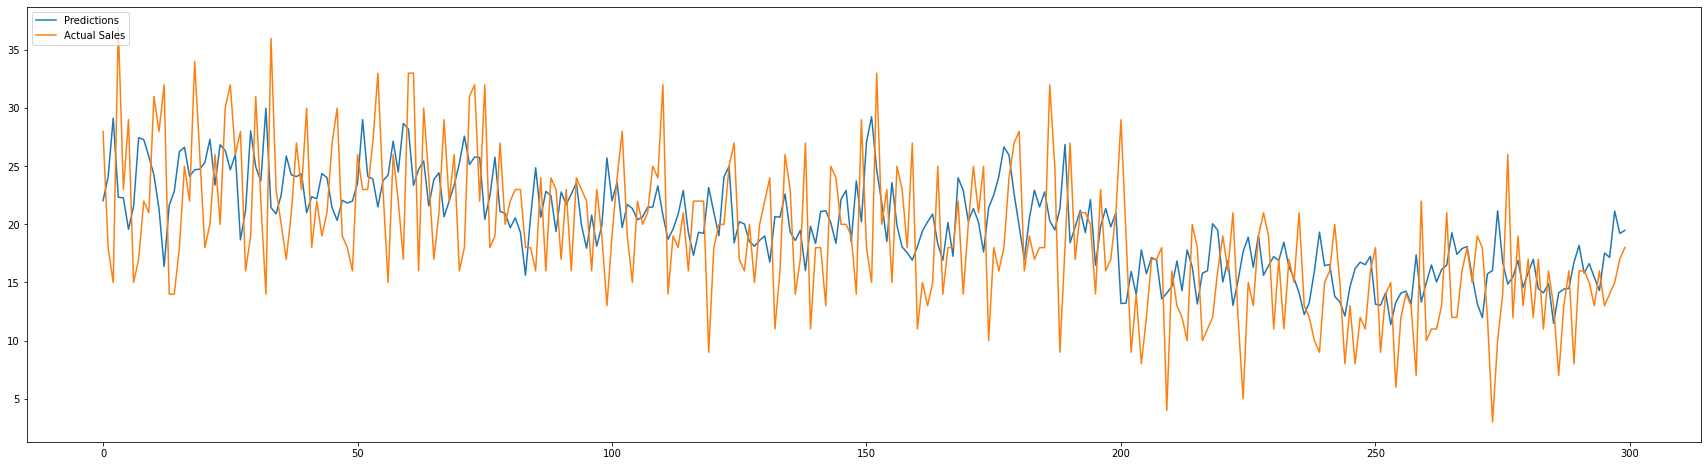

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.plot(y_pred[500:800], label='Predictions')
plt.plot(y_test[500:800], label='Actual Sales')
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()

In [ ]:
# Adding Exogenous Attributes or variables -weekday and weekend

In [ ]:
# Create Date-related Features to be used for EDA and Supervised ML: Regression
df['weekday'] = df['date'].dt.weekday
df['weekend'] = df['date'].dt.weekday >= 6
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df['weekend'] = np.where(df.weekend == 0,2, df.weekend)

In [ ]:
df

,date,sales,day_1,day_2,day_3,day_4,year,month,day,weekday,weekend
0,2013-01-01,13.0,11.0,14.0,13.0,10.0,2013,1,1,1,2
1,2013-01-02,11.0,14.0,13.0,10.0,12.0,2013,1,2,2,2
2,2013-01-03,14.0,13.0,10.0,12.0,10.0,2013,1,3,3,2
3,2013-01-04,13.0,10.0,12.0,10.0,9.0,2013,1,4,4,2
4,2013-01-05,10.0,12.0,10.0,9.0,12.0,2013,1,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...
912991,2017-12-23,70.0,76.0,51.0,41.0,63.0,2017,12,23,5,2
912992,2017-12-24,76.0,51.0,41.0,63.0,59.0,2017,12,24,6,1
912993,2017-12-25,51.0,41.0,63.0,59.0,74.0,2017,12,25,7,2
912994,2017-12-26,41.0,63.0,59.0,74.0,62.0,2017,12,26,1,2


In [ ]:
df.head(20)

,date,sales,day_1,day_2,day_3,day_4,year,month,day,weekday,weekend
0,2013-01-01,13.0,11.0,14.0,13.0,10.0,2013,1,1,1,2
1,2013-01-02,11.0,14.0,13.0,10.0,12.0,2013,1,2,2,2
2,2013-01-03,14.0,13.0,10.0,12.0,10.0,2013,1,3,3,2
3,2013-01-04,13.0,10.0,12.0,10.0,9.0,2013,1,4,4,2
4,2013-01-05,10.0,12.0,10.0,9.0,12.0,2013,1,5,5,2
5,2013-01-06,12.0,10.0,9.0,12.0,9.0,2013,1,6,6,1
6,2013-01-07,10.0,9.0,12.0,9.0,9.0,2013,1,7,7,2
7,2013-01-08,9.0,12.0,9.0,9.0,7.0,2013,1,8,1,2
8,2013-01-09,12.0,9.0,9.0,7.0,10.0,2013,1,9,2,2
9,2013-01-10,9.0,9.0,7.0,10.0,12.0,2013,1,10,3,2


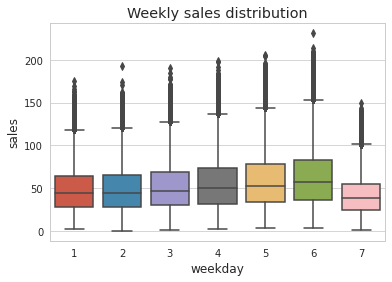

In [ ]:
plot = sns.boxplot(x='weekday', y='sales', data=df)
_ = plot.set(title='Weekly sales distribution')

In [ ]:
monthly_agg = df.groupby('month')['sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sns.boxplot(x='month', y='sales', data=df, ax=axs[0])
_ = sns.lineplot(x='month', y='sales', data=monthly_agg, ax=axs[1])

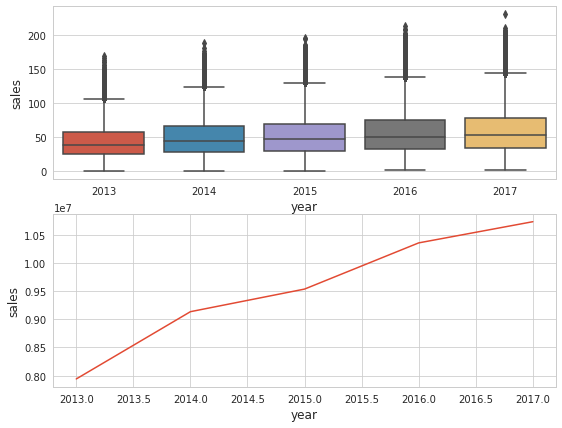

In [ ]:
yearly_agg = df.groupby('year')['sales'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sns.boxplot(x='year', y='sales', data=df, ax=axs[0])
_ = sns.lineplot(x='year', y='sales', data=yearly_agg, ax=axs[1])

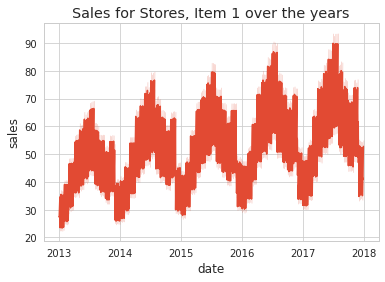

In [ ]:
plot = sns.lineplot(x='date', y='sales', data=df)
_ = plot.set(title='Sales for Stores, Item 1 over the years')

RANDOM FOREST REGRESSOR

Multivariate Analysis

TRAIN AND TEST SPLIT

In [ ]:
x1, x2, x3, x4, x5 , x6,  y = df['day_1'], df['day_2'], df['day_3'], df['day_4'],	df['weekday'] ,df['weekend'], df['sales']
x1, x2, x3, x4, x5 , x6,  y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6),  np.array(y)
x1, x2, x3, x4, x5 , x6,  y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), x5.reshape(-1,1), x6.reshape(-1,1),  y.reshape(-1,1)
split_percentage = 20
test_split = int(len(df)*(split_percentage/100))
print(test_split)
x = np.concatenate((x1, x2, x3, x4,x5 , x6 ), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

In [ ]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

need toadd hyperparameter tuning

XGBOOST REGRESSOR

using Mulyivariate Analysis

In [ ]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

In [ ]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

**LSTM**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [ ]:
#Variables for training
cols = list(df)[1:11]
#Date and volume columns are not used in training. 
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']

['sales', 'day_1', 'day_2', 'day_3', 'day_4', 'year', 'month', 'day', 'weekday', 'weekend']


In [ ]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

In [ ]:
# df_for_plot=df_for_training.tail(5000)
# df_for_plot.plot.line()

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


In [ ]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


In [ ]:

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (912982, 14, 10).
trainY shape == (912982, 1).


In [ ]:
#In my case, trainX has a shape (12809, 14, 5). 
#12809 because we are looking back 14 days (12823 - 14 = 12809). 
#Remember that we cannot look back 14 days until we get to the 15th day. 
#Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
#it needs multiple variables (5 in my example) to make this prediction. 
#This is why we can only predict a single day after our training, the day after where our data ends.
#To predict more days in future, we need all the 5 variables which we do not have. 
#We need to predict all variables if we want to do that. 

# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            19200     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
51356/51356 [==============================] - 2549s 50ms/step - loss: 0.0218 - val_loss: 8.3813e-04
Epoch 2/5
51356/51356 [==============================] - 2559s 50ms/step - loss: 0.0180 - val_loss: 0.0012
Epoch 3/5
51356/51356 [==============================] - 2407s 47ms/step - loss: 0.0177 - val_loss: 0.0014
Epoch 4/5
51356/51356 [==============================] - 2495s 49ms/step - loss: 0.0176 - val_loss: 1.7011e-04
Epoch 5/5
51356/51356 [==============================] - 2281s 44ms/step - loss: 0.0177 - val_loss: 6.8063e-04


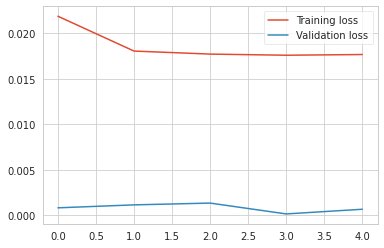

In [ ]:

# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

In [ ]:

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

1/1 [==============================] - 0s 304ms/step


In [ ]:

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

**LIGHTGBM **

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_params = {'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [ ]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

In [ ]:
model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  feval=lgbm_smape,
                  verbose_eval=100)

**FB PROPHET**

In [ ]:
!pip install prophet

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet